In [1]:
import numpy as np
import cupy as cp
import cupyx.scipy.signal as signal
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const
from astropy.stats import gaussian_sigma_to_fwhm,gaussian_fwhm_to_sigma

import datetime
import pickle
import importlib
import json
import time
import glob

import do_wavelet
# import the module to reimport the module
import importlib

with open('data/selected_band.pkl','rb') as f:
    selected_band = pickle.load(f)

wavelength_full = np.load('data/wavelength_full.npz')['wavelength_full']

c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Period_EVE_v1\do_wavelet.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


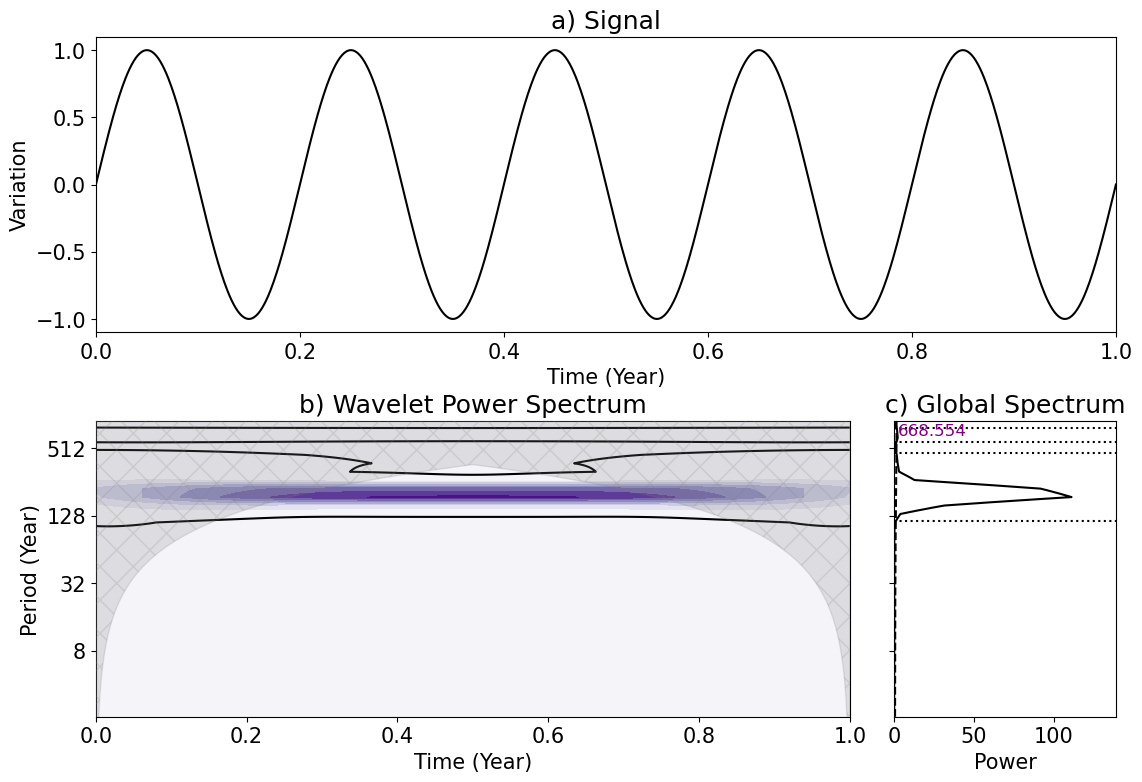

([1263.9570210194947, 668.5535519866424],
 array([114.0660873, 580.4660873]),
 array([460.0660873, 774.4660873]))

In [3]:
x=np.linspace(0,1,1000)
y=np.sin(2*np.pi*5*x)
do_wavelet.do_wavelet(sst=y,dt=1,time=x,noplot=False)

c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Period_EVE_v1\do_wavelet.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


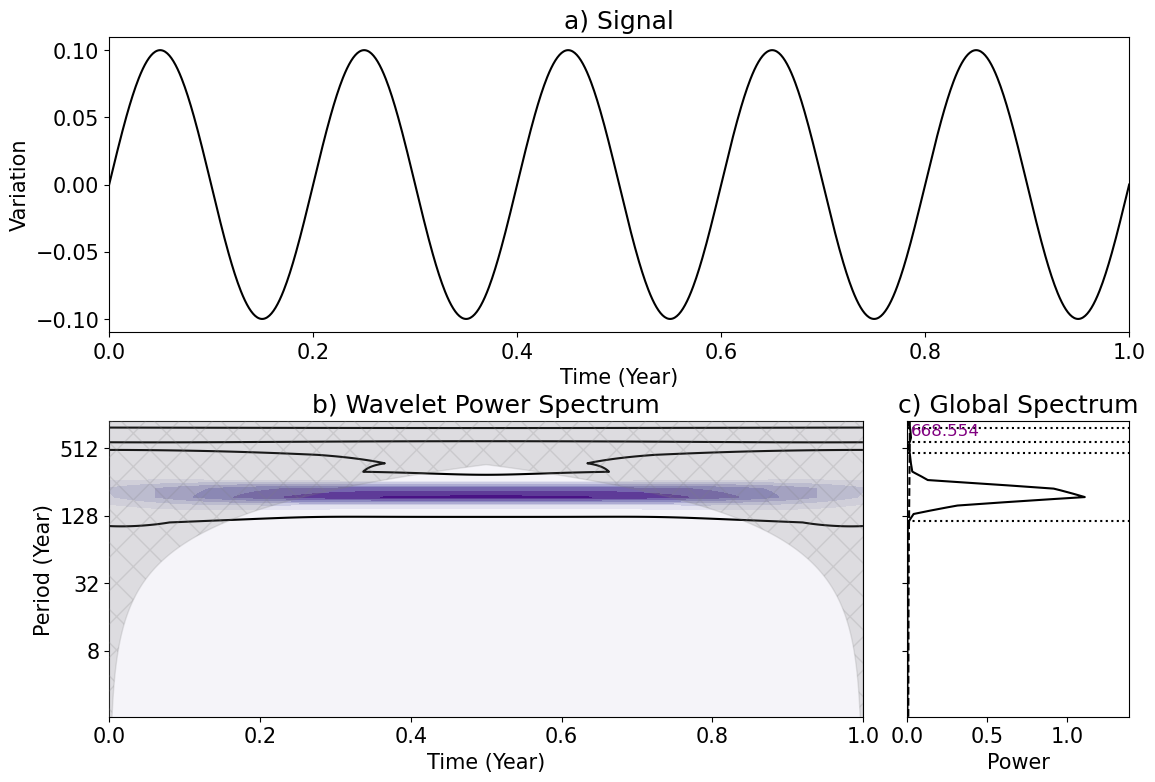

([1260.623411683061, 668.5535546993219],
 array([114.0660873, 580.4660873]),
 array([460.0660873, 774.4660873]))

In [5]:
x=np.linspace(0,1,1000)
y=0.1*np.sin(2*np.pi*5*x)
do_wavelet.do_wavelet(sst=y,dt=1,time=x,noplot=False)

In [2]:
selected_band

,Line Name,Wavelength Range,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index
0,Ni XI 148,"[14.75, 14.93]",6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]"
1,O VI 150,"[14.93, 15.09]",5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]"
2,Ni XII 152,"[15.13, 15.35]",6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ..."
3,Fe XXIII 154,"[15.35, 15.53]",7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]"
4,Fe IX 171,"[17, 17.21]",6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ..."
5,Fe IX 174,"[17.37, 17.59]",6.05,174.531,"[0.00069, 17.45, 0.0424]","[719, 720, 721, 722, 723, 724, 725, 726, 727, ..."
6,Fe X 177,"[17.63, 17.83]",6.05,177.240,"[0.00045, 17.72, 0.0424]","[732, 733, 734, 735, 736, 737, 738, 739, 740, ..."
7,Fe XI 180,"[17.95, 18.15]",6.15,180.401,"[0.0006, 18.05, 0.0424]","[748, 749, 750, 751, 752, 753, 754, 755, 756, ..."
8,Fe XI 182,"[18.15, 18.31]",6.15,182.167,"[0.00013, 18.22, 0.0424]","[758, 759, 760, 761, 762, 763, 764, 765]"
9,Fe X 185,"[18.35, 18.59]",6.05,184.537,"[0.0002, 18.45, 0.0424]","[768, 769, 770, 771, 772, 773, 774, 775, 776, ..."


## test of one file

In [12]:
index = 1
with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
    daily_df = pickle.load(file)
daily_df

,median_of_mean,median_of_stddev,median_of_amplitude,stddev_of_mean,stddev_of_stddev,stddev_of_amplitude,available_data
time,,,,,,,
2010-04-30,15.015847,0.042733,0.000036,0.001078,0.001133,9.974961e-07,8570
2010-05-01,15.015788,0.042836,0.000036,0.000993,0.001062,1.142104e-06,8579
2010-05-02,15.015765,0.043110,0.000036,0.001244,0.001265,9.085539e-07,8579
2010-05-03,15.015626,0.043230,0.000036,0.001027,0.001133,9.169991e-07,8640
2010-05-04,15.015468,0.043230,0.000037,0.001153,0.001287,9.795585e-07,8578
...,...,...,...,...,...,...,...
2014-05-21,15.015619,0.044049,0.000044,0.000925,0.001005,1.161718e-06,8581
2014-05-22,15.015673,0.043827,0.000044,0.000909,0.000966,1.029341e-06,8582
2014-05-23,15.015791,0.043852,0.000044,0.000969,0.000980,1.026702e-06,8582


In [14]:
selected_band.loc[index]

Line Name                                              O VI 150
Wavelength Range                                 [14.93, 15.09]
Temperature                                                 5.5
Accurate Wavelength                                     150.089
Initial Guess                          [4.4e-05, 15.01, 0.0424]
Wavelength Index       [597, 598, 599, 600, 601, 602, 603, 604]
Name: 1, dtype: object

Data variance =  2.035487646951664e-11
wave shape:  (39, 1486)
period shape:  (39,)
scale shape:  (39,)
coi shape:  (1486,)
peaks: [7.036037382121547e-11, 4.409899738913801e-10, 2.524424160220993e-09]
periods: [26.701602015238816, 259.2727393339304, 853.3345791336595]


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


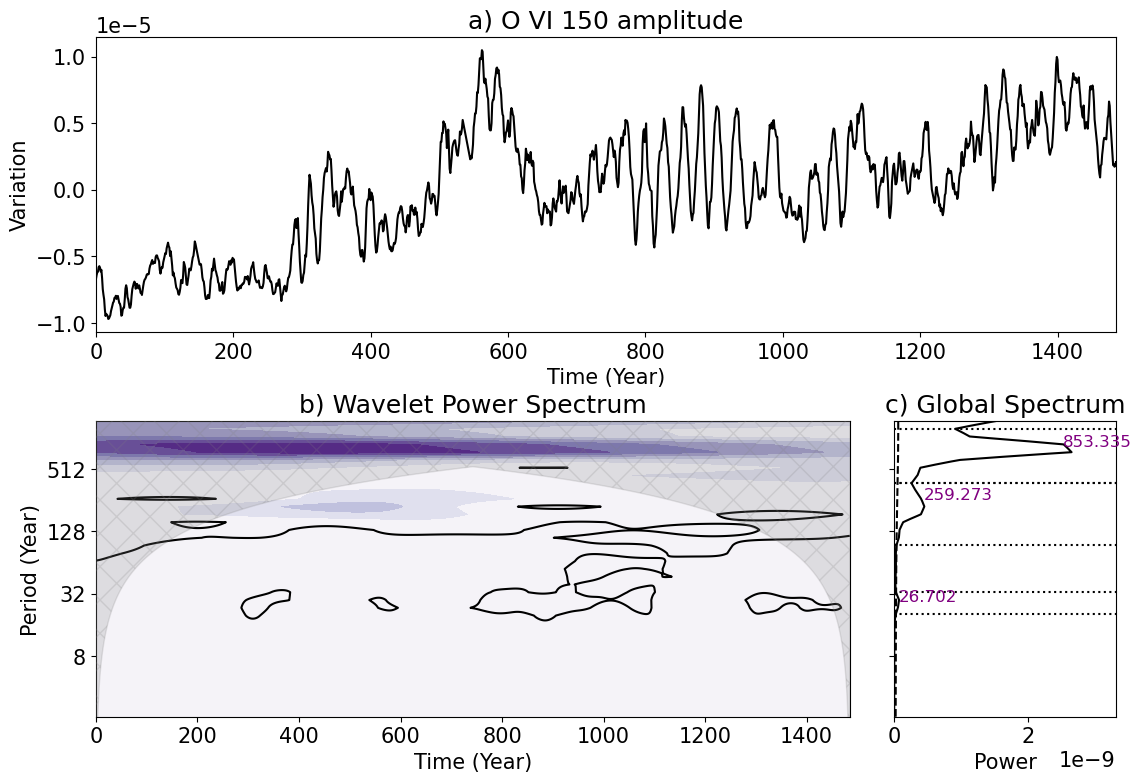

([26.701602015238816, 259.2727393339304, 853.3345791336595],
 array([ 20.4660873,  94.4660873, 374.0660873]),
 array([  32.8660873,  374.0660873, 1257.8660873]))

In [16]:
daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

property='amplitude'
do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
                      dt=1,
                      title=selected_band.loc[index]['Line Name']+' '+property,
)

Data variance =  2.035487646951664e-11
wave shape:  (39, 1486)
period shape:  (39,)
scale shape:  (39,)
coi shape:  (1486,)
peaks: [7.036037382121547e-11, 4.409899738913801e-10, 2.524424160220993e-09]
periods: [26.701602015238816, 259.2727393339304, 853.3345791336595]


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


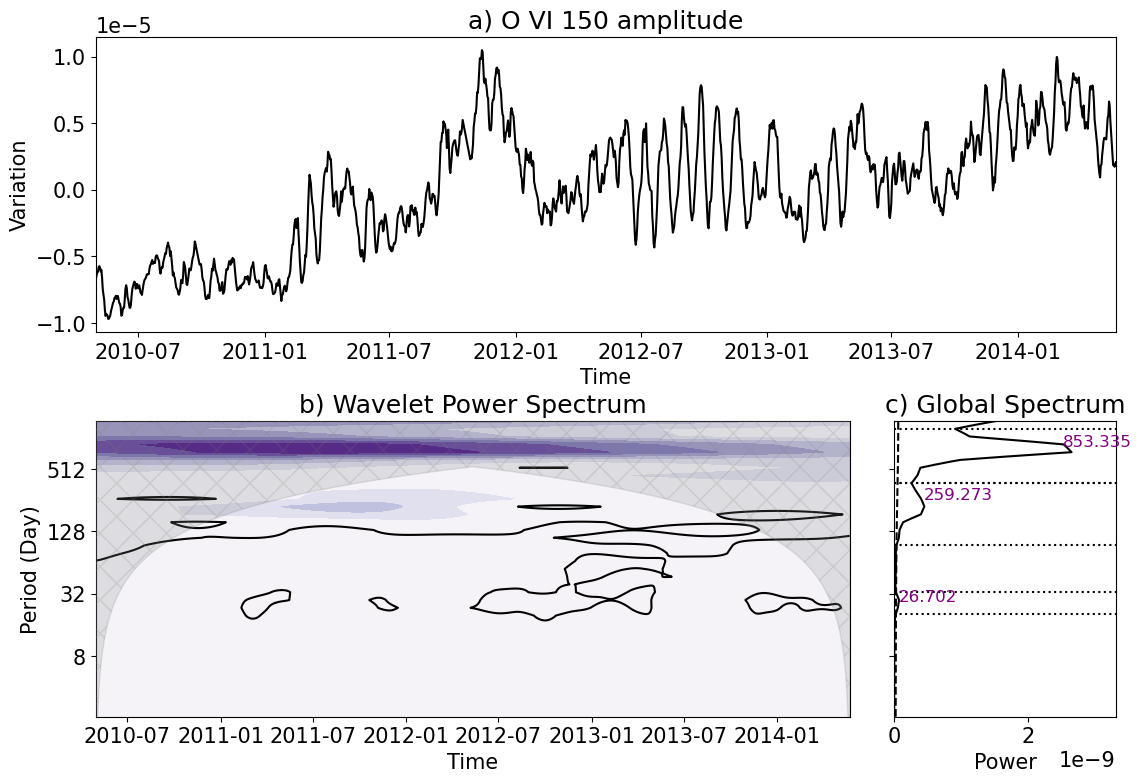

Data variance =  3.198070020792974e-07
wave shape:  (39, 1486)
period shape:  (39,)
scale shape:  (39,)
coi shape:  (1486,)
peaks: [1.3809018480908533e-06, 1.4419784128125722e-06, 1.3626861797892048e-06, 1.2114247689380092e-06, 7.087160152759883e-06, nan, 8.236668077276235e-06]
periods: [13.481030488216206, 30.499353485649124, 53.08002386760945, 97.63195575820893, 258.31334353801896, nan, 1030.6623430965326]


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


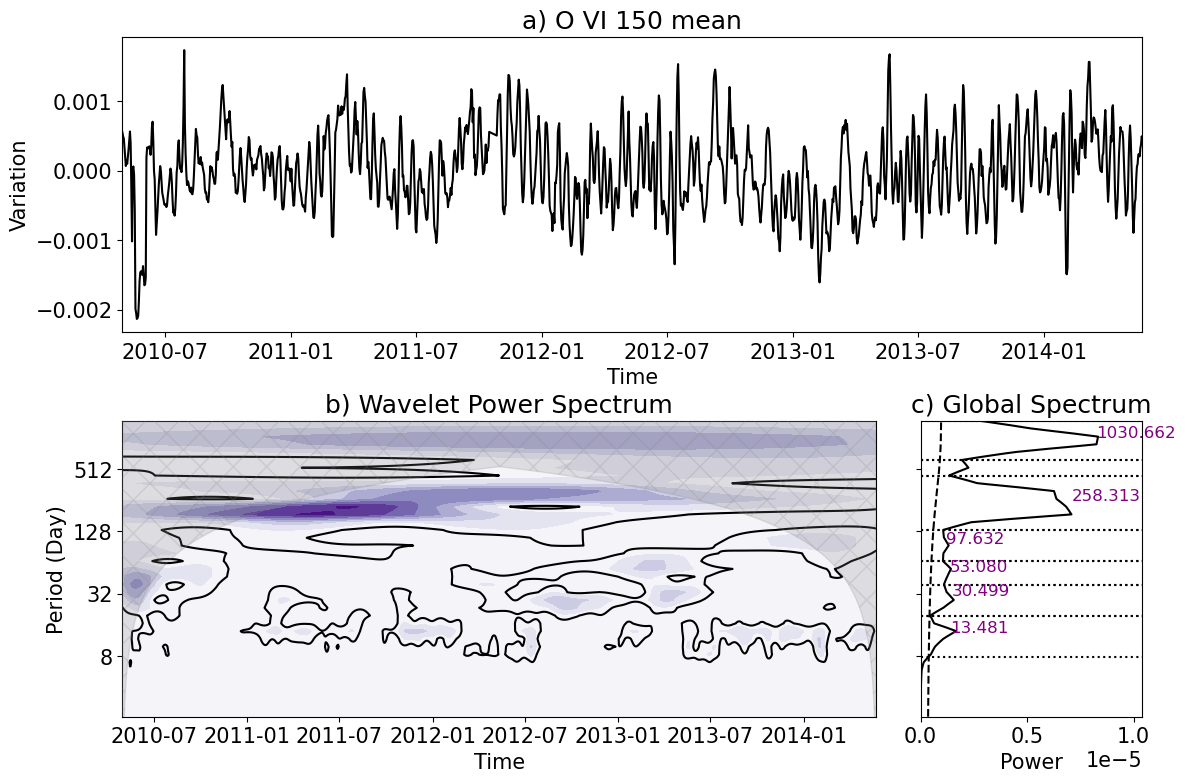

Data variance =  1.115510465674006e-06
wave shape:  (39, 1486)
period shape:  (39,)
scale shape:  (39,)
coi shape:  (1486,)
peaks: [1.9945676359367955e-06, 9.755179343871433e-06, 3.3010733447568526e-05, 0.00011570529875516688]
periods: [26.806840490411698, 134.2682339833241, 249.2515076781942, 824.8483661284422]


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


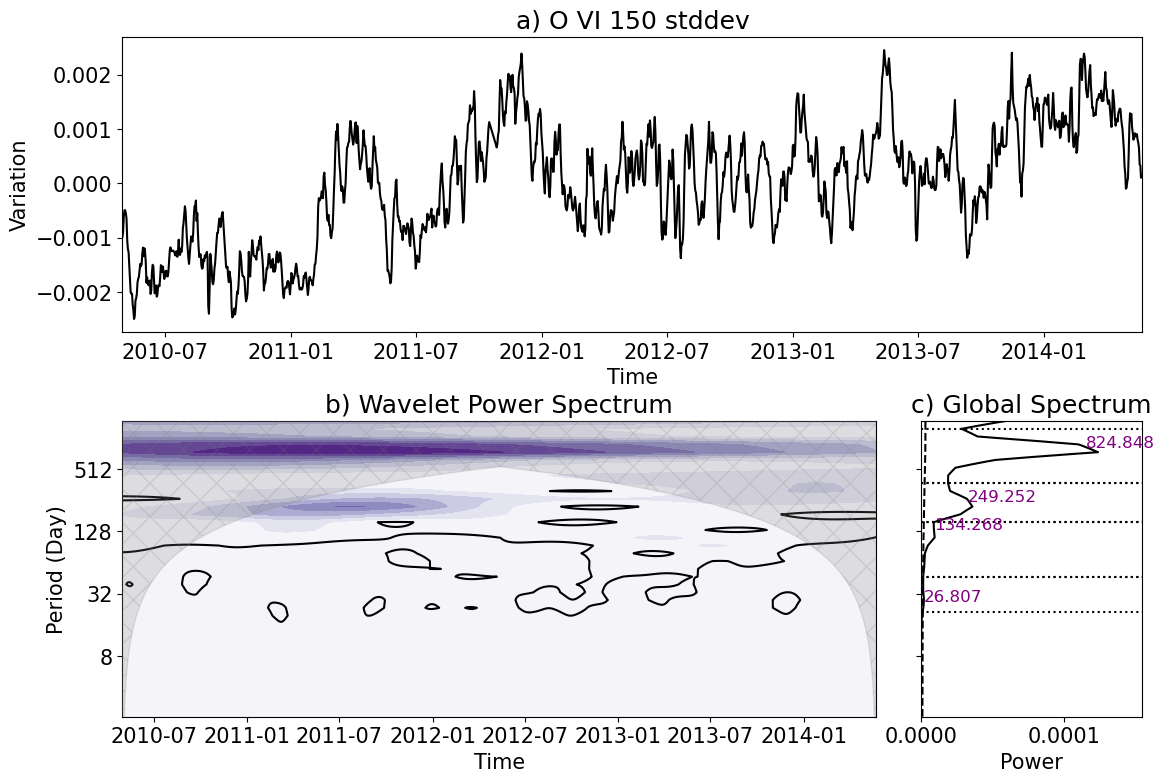

In [18]:
property_list=['amplitude','mean','stddev']
for property in property_list:
    do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
        dt=1,
        time=daily_df.index,
        show_peaks=True,
        unit=None,
        title=selected_band.loc[index]['Line Name']+' '+property,
        # fig_name='output/daily_wavelet/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
        )

# Wavelet

In [2]:
# wavelet transform, using guassian fit to find the peak
property_list=['amplitude','mean','stddev']

for index in selected_band.index[:]:
    with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
        daily_df = pickle.load(file)
    with open('./data/daily_df/no_eclipse_process/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
        daily_df_no_eclipse = pickle.load(file)
    # 不知道为什么不加下面这一行会报错
    daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]
    daily_df_no_eclipse=daily_df_no_eclipse[daily_df_no_eclipse.index<=pd.to_datetime('2014-05-24')]

    for property in property_list:
        do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
           dt=1,
           time=daily_df.index,
           show_peaks=True,
           unit=None,
           title=selected_band.loc[index]['Line Name']+' '+property,
           fig_name='output/daily_wavelet/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png') 
        
        do_wavelet.do_wavelet(sst=daily_df_no_eclipse['median_of_'+property].values-daily_df['median_of_'+property].values,
              dt=1,
              time=daily_df_no_eclipse.index,
              show_peaks=True,
              unit=None,
              title=selected_band.loc[index]['Line Name']+' '+property,
              fig_name='output/daily_wavelet/eclipse_impact/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
              )
        
        do_wavelet.do_wavelet(sst=daily_df_no_eclipse['median_of_'+property].values,
              dt=1,
              time=daily_df_no_eclipse.index,
              show_peaks=True,
              unit=None,
              title=selected_band.loc[index]['Line Name']+' '+property,
              fig_name='output/daily_wavelet/without_eclipse_deletion/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
              )
    

Data variance =  4.709296744884503e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.916285241265782e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.708389952239654e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.89312003873677e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3195177655535376e-12


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.889603472157162e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5494814970881353e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4799074401368862e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5502228029956742e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.035487646951664e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9300800370356636e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.034774133103393e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.198070020792974e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.956028685170262e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2026796100551234e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.115510465674006e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0210656916717175e-11


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1155708732117994e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.865755409369866e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.267275474529478e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.8651168987909775e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2998946163741072e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4425235917578787e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3016197780553047e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.08278652616557e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1631060665464364e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.082431673728656e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.183883349993215e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5088372872482145e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.183630697641894e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.9183206378235065e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.01290965102229e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.921620334179351e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.716403988675079e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.409855361045103e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.7156334812570836e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.6317663904464252e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.128459259731049e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.6292410682575752e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.212645433657458e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.96088587290795e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.207428578316341e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.8168253603460686e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2751410945251932e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.816214260865629e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.750379489190707e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.769292025296227e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.747634963345229e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.714933954002258e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.590123998463521e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.706647579609401e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.605216317062342e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.397088789702202e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.601722812740213e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2443616610745955e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5902061964527505e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2431477391841976e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.824120615839241e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.018127582533233e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.823940212858624e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1415027039534696e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.375691162707438e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1412384061336709e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0476229062517964e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5108390679820268e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0473348892712091e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0540469444877836e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2920893267231196e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0540930562772832e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.990997285153441e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.150006343373187e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.9902025032260223e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.708435843704326e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.551165028030343e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.707037780130226e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2195206272291007e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.747188631677499e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2195045313073423e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2017771905871324e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.173507883365441e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.199180564410546e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.731004370069144e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.1545852691152963e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.728763528803843e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.065029730936598e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.197046877150169e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.06338432796052e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.369274697713608e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7568830359093412e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.36819388048563e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2022689850931583e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.750714541732701e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2018807518003574e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.6276404135109138e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.34841902902458e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.626169681964403e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.883410671102063e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0347311084693325e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.884080729785746e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.145258931616302e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2761850480481122e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.143701765673883e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1938688086967645e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.13156797228655e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1938452525153293e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.600520217490792e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7956621481119733e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.598919323092583e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5893240160166826e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3745668350835699e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.588131258096901e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.908924149898811e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.781318549495332e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.90051574019278e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.1051457935715085e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.641180547736426e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.103535327151755e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.46634175769463e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8803205951055857e-14


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4661035044007616e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3618382677029963e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6766868731781968e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.360318836306649e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0753368758982916e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.09934500101461e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0743530035428424e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.516444809635672e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8558300227164515e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.516280503795375e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.823552493908047e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0590499953337688e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.821002006525812e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.544710664039986e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.243415730196726e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.544970015408136e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.7183364044009153e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3123404864722103e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.717189245517978e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1147021103079174e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.0571654267022894e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1148099349990338e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6882439559773302e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.5927190334772344e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6874696580997087e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7644126176299102e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3811555990385456e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7628269873530735e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.924010243731523e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.1035873453559542e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9260632072696145e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5930753751888453e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.733821485021521e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5929188906501505e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3339737824048983e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.473956059935214e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3333134317996246e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6588934839854657e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.9544605613792464e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.658167766326496e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.4502831826627325e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.540460616208057e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.450885241741445e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.160778385494412e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.77296908240823e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1604959121185597e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.377299966748054e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9590221685529906e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.376438006462015e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.045623600226289e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6551845727434605e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.049545116626884e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.399915607060478e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1379159767687686e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3992455208799804e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4664230689821951e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.948920557941606e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4666022261349104e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2503866429743856e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0646322273883529e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2557387316864367e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.205758767180972e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.210038257451358e-15


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.2049569764122695e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3698695181990696e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.5227489617504545e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3702399389878668e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2582104470486138e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.958565392785359e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2586293939050682e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4227974532764784e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6989736062925668e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4218573791113998e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4105925842349776e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.811488627722188e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4100954353259636e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.600427796649675e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.042741109602319e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.590035702390103e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0092522191592782e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5764677899954874e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0090503754273772e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.990985114555524e-06


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.182279589808756e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.99080464763411e-06


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9252879587249173e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.5446744534460387e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9246284821690603e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.545127420313962e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.77091854030456e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.537312598421011e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.058276964461611e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2349043724809963e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.059406603632972e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.396471407871877e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.6045594285084e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.405827057911839e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9706643335997472e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3633378161381939e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9702875640779123e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.673999313505938e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.421684054059649e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.671015513667113e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.117751909927722e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.280055109823376e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.118133621897614e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.663441449649171e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2650692704020644e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.663355534163011e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.313519302037497e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.195135522718508e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.313485940361945e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3481303969396806e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.1943790075617344e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3481198771135031e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.5152400205647646e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.815770315450876e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.515103913664568e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.00699583361203e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.47463744116912e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0070120001975018e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.489708058623595e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.041607475613115e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.489554034428517e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.433785668383694e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.621453051395055e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4336197291457456e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0157961324434413e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.238408946156985e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0156341501180521e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.83613179100596e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.000990486639201e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8362917879350575e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.453570344443369e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5317036332786218e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.4534453654078193e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.517755489252044e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.174182769408922e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.516234644226115e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.0732594970310184e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.0930196310265934e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.073266850457714e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.432610650301277e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2746641626089063e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4325734013829365e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7773433618920593e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.806849719476143e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7774735110913225e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.042965594347395e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.518882630372148e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.04293114338798e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.508148604201377e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.733628459641679e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5079235402705112e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.639778748295385e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2400999401637512e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.639548509999326e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2560872091178156e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.401213797627953e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.255954402318924e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.6443380832200265e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.566767385227054e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.644279331898142e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.709489020062758e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.292646740703247e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.705761226719471e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.323102543287438e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.361307300005392e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3232107419341763e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6928356075210233e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.574413820355206e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6928018105839444e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.513829290709607e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5247287419216596e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.513975208004149e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.871622726120328e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.622329607098349e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.871663799604959e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.3875136066109833e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.6641294605143385e-18


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.387474585736072e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.129958034245452e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.503855561991596e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.1295709716743426e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.071874004686905e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.8284788137705648e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.0719204600566786e-07


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.885673211042465e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6855192482086799e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.88511131853733e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3855398264033873e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.346451083883652e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.38497307350058e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.5225912449184e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.046125076832309e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.522090382388679e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.5021258551423645e-12


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.7855242589891723e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.500806828112884e-12


c:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0686679013651478e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.652313820052301e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0688663743790661e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.097185180978331e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.857521127961552e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.0974938645751126e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.814045873586443e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.029551059663588e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.813683351871392e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0145024796097207e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.11914324819595e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.014338741225463e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.390095309005273e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.7862831021887e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3901223053478183e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3104188341752082e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.350282707580151e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3102685176946159e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5068617678668976e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.697904210788438e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5068957964694944e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3043229779825623e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.113887894303507e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.30444343792464e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.983011292222827e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.36609959132333e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9824856983637383e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.386674393046674e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.908172680582113e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3873388376820568e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6464588058409406e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.37293784490034e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6467435582237442e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.188457346267306e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0777880141198185e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1883992757093823e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3221358330120186e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4610728122145504e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3220775383550294e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.847451511692085e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9894977735280566e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.847750507298014e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8992629282183738e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3358807073287764e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8991483592872964e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4482954934728375e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0401343822265674e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.448318356042219e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.869657146679169e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.8083260377869835e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.870048427409241e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3833222189011164e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.339828351006227e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3832150687879788e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3817228074414577e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.136748498716885e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3817476217795975e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.397614090527431e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1985312756998806e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3978143817440505e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.085543220537245e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.1866739143518556e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.085375388147091e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3156782284886382e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8838896429958617e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.315602787336928e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3122787278075974e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.253332408261824e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.31228191463474e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1619645145088298e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.181133145304075e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1618946681907646e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2491137242985313e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.354842682516724e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2492853220804111e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.196833426912209e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0575959084600046e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.1967307904745712e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.729773517513041e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.298208971929419e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.72951862051022e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.019752723778396e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.765589156506996e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0200497753867415e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3221016494459407e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.4798112163897886e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3220893693499062e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.25290940071397e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.215808536946106e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.251071502093213e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.423914132960836e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5016149530087855e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.427876906502237e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.8015942447799815e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.877879144388388e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.8013892110725997e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.582718651159223e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9929134127753823e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.58237210805034e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.062182025452982e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.258561487735142e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0623398640713504e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.157851191890284e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.938571698274992e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1576978778737489e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4366932036024326e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.674180354209531e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4362614991658536e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.861065626659316e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.901769531757064e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.86716269783823e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.877881876243978e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.590515601537223e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.877919013014108e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## put dozens of png into a pdf

In [7]:
from fpdf import FPDF

In [25]:
for property in property_list[:]:
    pngs=['output/daily_wavelet/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png' for index in selected_band.index]
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    # one png one page
    for i in range(0,len(pngs)):
        pdf.add_page()
        pdf.image(pngs[i], x = None, y = None, w = 200, h = 0)
    pdf.output("output/daily_wavelet/"+property+"/combined_wavelet.pdf")



# old find peak method result

In [3]:
import importlib
importlib.reload(do_wavelet)

# comment the part: use gaussian fit to obtain the precise peak

<module 'do_wavelet' from 'd:\\py_repo\\EVE-spectrum-correction\\Chapter4_v3\\basic_ops\\eve_ops\\do_wavelet.py'>

In [4]:
# wavelet transform
property_list=['amplitude','mean','stddev']

for index in selected_band.index[:]:
    with open('./data/daily_df/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
        daily_df = pickle.load(file)
    with open('./data/daily_df/no_eclipse_process/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
        daily_df_no_eclipse = pickle.load(file)
    
    #wavelet 代码仅对偶数有效
    daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]
    daily_df_no_eclipse=daily_df_no_eclipse[daily_df_no_eclipse.index<=pd.to_datetime('2014-05-24')]

    for property in property_list:
        do_wavelet.do_wavelet(sst=daily_df['median_of_'+property].values,
           dt=1,
           time=daily_df.index,
           show_peaks=True,
           unit=None,
           title=selected_band.loc[index]['Line Name']+' '+property,
           fig_name='output/daily_wavelet/old_findpeak/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png') 
        
        do_wavelet.do_wavelet(sst=daily_df_no_eclipse['median_of_'+property].values-daily_df['median_of_'+property].values,
              dt=1,
              time=daily_df_no_eclipse.index,
              show_peaks=True,
              unit=None,
              title=selected_band.loc[index]['Line Name']+' '+property,
              fig_name='output/daily_wavelet/old_findpeak/eclipse_impact/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
              )
        do_wavelet.do_wavelet(sst=daily_df_no_eclipse['median_of_'+property].values,
              dt=1,
              time=daily_df_no_eclipse.index,
              show_peaks=True,
              unit=None,
              title=selected_band.loc[index]['Line Name']+' '+property,
              fig_name='output/daily_wavelet/old_findpeak/without_eclipse_deletion/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
              )

Data variance =  4.709296744884503e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.916285241265782e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.708389952239654e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.89312003873677e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3195177655535376e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.889603472157162e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5494814970881353e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4799074401368862e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5502228029956742e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.035487646951664e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9300800370356636e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.034774133103393e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.198070020792974e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.956028685170262e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2026796100551234e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.115510465674006e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0210656916717175e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1155708732117994e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.865755409369866e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.267275474529478e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.8651168987909775e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2998946163741072e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4425235917578787e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3016197780553047e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.08278652616557e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1631060665464364e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.082431673728656e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.183883349993215e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5088372872482145e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.183630697641894e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.9183206378235065e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.01290965102229e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.921620334179351e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.716403988675079e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.409855361045103e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.7156334812570836e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.6317663904464252e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.128459259731049e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.6292410682575752e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.212645433657458e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.96088587290795e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.207428578316341e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.8168253603460686e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2751410945251932e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.816214260865629e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.750379489190707e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.769292025296227e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.747634963345229e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.714933954002258e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.590123998463521e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.706647579609401e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.605216317062342e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.397088789702202e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.601722812740213e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2443616610745955e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5902061964527505e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2431477391841976e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.824120615839241e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.018127582533233e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.823940212858624e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1415027039534696e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.375691162707438e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1412384061336709e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0476229062517964e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5108390679820268e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0473348892712091e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0540469444877836e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2920893267231196e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0540930562772832e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.990997285153441e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.150006343373187e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.9902025032260223e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.708435843704326e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.551165028030343e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.707037780130226e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2195206272291007e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.747188631677499e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2195045313073423e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2017771905871324e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.173507883365441e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.199180564410546e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.731004370069144e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.1545852691152963e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.728763528803843e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.065029730936598e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.197046877150169e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.06338432796052e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.369274697713608e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7568830359093412e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.36819388048563e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2022689850931583e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.750714541732701e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.2018807518003574e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.6276404135109138e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.34841902902458e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.626169681964403e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.883410671102063e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0347311084693325e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.884080729785746e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.145258931616302e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2761850480481122e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.143701765673883e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1938688086967645e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.13156797228655e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1938452525153293e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.600520217490792e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7956621481119733e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.598919323092583e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5893240160166826e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3745668350835699e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.588131258096901e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.908924149898811e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.781318549495332e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.90051574019278e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.1051457935715085e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.641180547736426e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.103535327151755e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.46634175769463e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8803205951055857e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4661035044007616e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3618382677029963e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6766868731781968e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.360318836306649e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0753368758982916e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.09934500101461e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0743530035428424e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.516444809635672e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8558300227164515e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.516280503795375e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.823552493908047e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0590499953337688e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.821002006525812e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.544710664039986e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.243415730196726e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.544970015408136e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.7183364044009153e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3123404864722103e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.717189245517978e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1147021103079174e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.0571654267022894e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1148099349990338e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6882439559773302e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.5927190334772344e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6874696580997087e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7644126176299102e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3811555990385456e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7628269873530735e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.924010243731523e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.1035873453559542e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9260632072696145e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5930753751888453e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.733821485021521e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5929188906501505e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3339737824048983e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.473956059935214e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3333134317996246e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6588934839854657e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.9544605613792464e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.658167766326496e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.4502831826627325e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.540460616208057e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.450885241741445e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.160778385494412e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.77296908240823e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1604959121185597e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.377299966748054e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9590221685529906e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.376438006462015e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.045623600226289e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6551845727434605e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.049545116626884e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.399915607060478e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1379159767687686e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3992455208799804e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4664230689821951e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.948920557941606e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4666022261349104e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2503866429743856e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0646322273883529e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2557387316864367e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.205758767180972e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.210038257451358e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.2049569764122695e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3698695181990696e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.5227489617504545e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3702399389878668e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2582104470486138e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.958565392785359e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2586293939050682e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4227974532764784e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6989736062925668e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4218573791113998e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4105925842349776e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.811488627722188e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4100954353259636e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.600427796649675e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.042741109602319e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.590035702390103e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0092522191592782e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5764677899954874e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0090503754273772e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.990985114555524e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.182279589808756e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.99080464763411e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9252879587249173e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.5446744534460387e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9246284821690603e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.545127420313962e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.77091854030456e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.537312598421011e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.058276964461611e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2349043724809963e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.059406603632972e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.396471407871877e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.6045594285084e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.405827057911839e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9706643335997472e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3633378161381939e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9702875640779123e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.673999313505938e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.421684054059649e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.671015513667113e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.117751909927722e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.280055109823376e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.118133621897614e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.663441449649171e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2650692704020644e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.663355534163011e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.313519302037497e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.195135522718508e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.313485940361945e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3481303969396806e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.1943790075617344e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3481198771135031e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.5152400205647646e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.815770315450876e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.515103913664568e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.00699583361203e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.47463744116912e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0070120001975018e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.489708058623595e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.041607475613115e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.489554034428517e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.433785668383694e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.621453051395055e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4336197291457456e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0157961324434413e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.238408946156985e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0156341501180521e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.83613179100596e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.000990486639201e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8362917879350575e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.453570344443369e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5317036332786218e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.4534453654078193e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.517755489252044e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.174182769408922e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.516234644226115e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.0732594970310184e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.0930196310265934e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.073266850457714e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.432610650301277e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2746641626089063e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4325734013829365e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7773433618920593e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.806849719476143e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.7774735110913225e-05


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.042965594347395e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.518882630372148e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.04293114338798e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.508148604201377e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.733628459641679e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5079235402705112e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.639778748295385e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.2400999401637512e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.639548509999326e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2560872091178156e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.401213797627953e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.255954402318924e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.6443380832200265e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.566767385227054e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.644279331898142e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.709489020062758e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.292646740703247e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.705761226719471e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.323102543287438e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.361307300005392e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3232107419341763e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6928356075210233e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.574413820355206e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6928018105839444e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.513829290709607e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5247287419216596e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.513975208004149e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.871622726120328e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.622329607098349e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.871663799604959e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.3875136066109833e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.6641294605143385e-18


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.387474585736072e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.129958034245452e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.503855561991596e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.1295709716743426e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.071874004686905e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.8284788137705648e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.0719204600566786e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.885673211042465e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6855192482086799e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.88511131853733e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3855398264033873e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.346451083883652e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.38497307350058e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.5225912449184e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.046125076832309e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.522090382388679e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.5021258551423645e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.7855242589891723e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.500806828112884e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0686679013651478e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.652313820052301e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0688663743790661e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.097185180978331e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.857521127961552e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.0974938645751126e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.814045873586443e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.029551059663588e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.813683351871392e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0145024796097207e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.11914324819595e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.014338741225463e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.390095309005273e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.7862831021887e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3901223053478183e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3104188341752082e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.350282707580151e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3102685176946159e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5068617678668976e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.697904210788438e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.5068957964694944e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3043229779825623e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.113887894303507e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.30444343792464e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.983011292222827e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.36609959132333e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9824856983637383e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.386674393046674e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.908172680582113e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3873388376820568e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6464588058409406e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.37293784490034e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.6467435582237442e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.188457346267306e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0777880141198185e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1883992757093823e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3221358330120186e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4610728122145504e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3220775383550294e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.847451511692085e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9894977735280566e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.847750507298014e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8992629282183738e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3358807073287764e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8991483592872964e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.4482954934728375e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.0401343822265674e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.448318356042219e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.869657146679169e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.8083260377869835e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.870048427409241e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3833222189011164e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.339828351006227e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3832150687879788e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3817228074414577e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.136748498716885e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3817476217795975e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.397614090527431e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1985312756998806e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.3978143817440505e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.085543220537245e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.1866739143518556e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.085375388147091e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3156782284886382e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.8838896429958617e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.315602787336928e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.3122787278075974e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.253332408261824e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.31228191463474e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1619645145088298e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.181133145304075e-17


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1618946681907646e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2491137242985313e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.354842682516724e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.2492853220804111e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.196833426912209e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0575959084600046e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.1967307904745712e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.729773517513041e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.298208971929419e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.72951862051022e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.019752723778396e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.765589156506996e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0200497753867415e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3221016494459407e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.4798112163897886e-12


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.3220893693499062e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.25290940071397e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.215808536946106e-14


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.251071502093213e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.423914132960836e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.5016149530087855e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  7.427876906502237e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.8015942447799815e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.877879144388388e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  2.8013892110725997e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.582718651159223e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.9929134127753823e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.58237210805034e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.062182025452982e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.258561487735142e-11


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.0623398640713504e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.157851191890284e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.938571698274992e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  1.1576978778737489e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4366932036024326e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  5.674180354209531e-15


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  3.4362614991658536e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.861065626659316e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  8.901769531757064e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  9.86716269783823e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.877881876243978e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  4.590515601537223e-13


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Data variance =  6.877919013014108e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


# The impact of setting solar eclipse to nan

## solar eclipse set to np.nan

In [ ]:
index=0

with open('./data/fit_10s/fit_10s_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
    fit_df = pickle.load(file)
fit_df.set_index('time',inplace=True)

fit_df['amplitude']=np.where(fit_df['eclipse_flag'].values==0,fit_df['amplitude'].values,np.nan)
fit_df['mean']=np.where(fit_df['eclipse_flag'].values==0,fit_df['mean'].values,np.nan)
fit_df['stddev']=np.where(fit_df['eclipse_flag'].values==0,fit_df['stddev'].values,np.nan)

stddev_of_mean=fit_df['mean'].resample('D').agg(np.nanstd)
stddev_of_stddev=fit_df['stddev'].resample('D').agg(np.nanstd)
stddev_of_amplitude=fit_df['amplitude'].resample('D').agg(np.nanstd)
available_data=fit_df['amplitude'].resample('D').agg(f)


columns_to_agg = ['amplitude', 'mean', 'stddev']
daily_median = fit_df[columns_to_agg].resample('D').agg(np.nanmedian)

# Create a new DataFrame 'daily_fit_df' to store the daily median, stddev, and amplitude
# fwhm=2.3*stddev
daily_df = pd.DataFrame()
daily_df['median_of_mean'] = daily_median['mean']
daily_df['median_of_stddev'] = daily_median['stddev']
daily_df['median_of_amplitude'] = daily_median['amplitude']

daily_df['stddev_of_mean']=stddev_of_mean
daily_df['stddev_of_stddev']=stddev_of_stddev
daily_df['stddev_of_amplitude']=stddev_of_amplitude

daily_df['available_data']=available_data

Data variance =  4.709296744884503e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


([27.86608729549853, 222.2660872954987, 748.0660872954992],
 array([ 21.8660873,  93.4660873, 374.0660873]),
 array([  31.6660873,  374.0660873, 1057.8660873]))

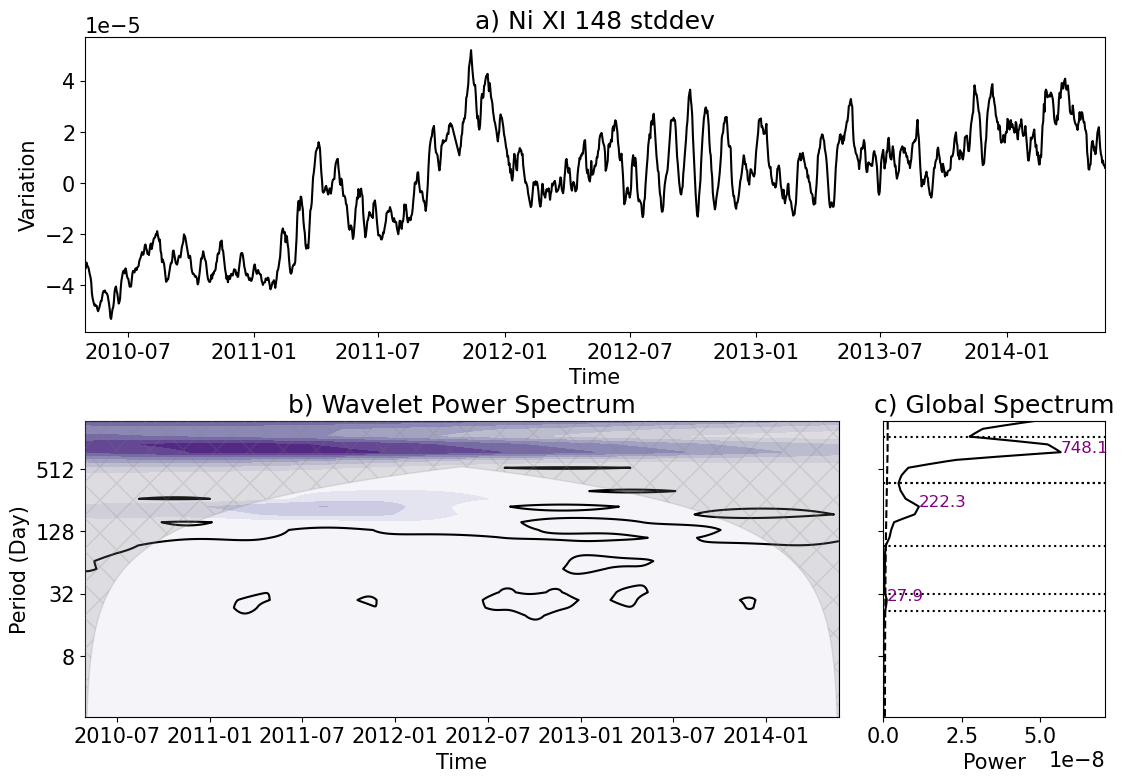

In [ ]:
daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

do_wavelet(sst=daily_df['median_of_'+'amplitude'].values,
    dt=1,
    time=daily_df.index,
    show_peaks=True,
    unit=None,
    title=selected_band.loc[index]['Line Name']+' '+'amplitude',
    fig_name='output/daily_wavelet/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png') 

## ignore solar eclipse


In [ ]:
index=0

with open('./data/fit_10s/fit_10s_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
    fit_df = pickle.load(file)
fit_df.set_index('time',inplace=True)

stddev_of_mean=fit_df['mean'].resample('D').agg(np.nanstd)
stddev_of_stddev=fit_df['stddev'].resample('D').agg(np.nanstd)
stddev_of_amplitude=fit_df['amplitude'].resample('D').agg(np.nanstd)
available_data=fit_df['amplitude'].resample('D').agg(f)


columns_to_agg = ['amplitude', 'mean', 'stddev']
daily_median = fit_df[columns_to_agg].resample('D').agg(np.nanmedian)

# Create a new DataFrame 'daily_fit_df' to store the daily median, stddev, and amplitude
# fwhm=2.3*stddev
daily_df_eclipse = pd.DataFrame()
daily_df_eclipse['median_of_mean'] = daily_median['mean']
daily_df_eclipse['median_of_stddev'] = daily_median['stddev']
daily_df_eclipse['median_of_amplitude'] = daily_median['amplitude']

daily_df_eclipse['stddev_of_mean']=stddev_of_mean
daily_df_eclipse['stddev_of_stddev']=stddev_of_stddev
daily_df_eclipse['stddev_of_amplitude']=stddev_of_amplitude

daily_df_eclipse['available_data']=available_data

In [ ]:
daily_df_eclipse=daily_df_eclipse[daily_df_eclipse.index<=pd.to_datetime('2014-05-24')]

Data variance =  4.708389952239654e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


([27.86608729549853, 222.2660872954987, 748.0660872954992],
 array([ 21.8660873,  93.4660873, 374.0660873]),
 array([  31.6660873,  374.0660873, 1057.8660873]))

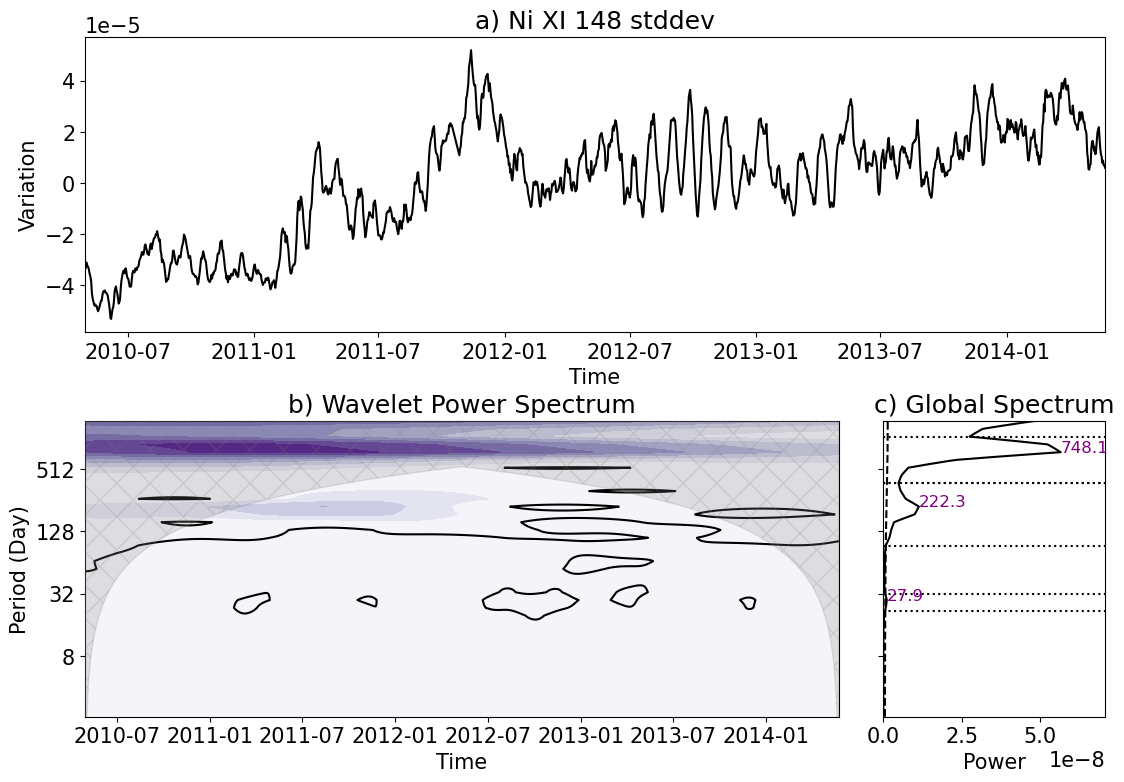

In [ ]:
do_wavelet(sst=daily_df_eclipse['median_of_'+'amplitude'].values,
    dt=1,
    time=daily_df_eclipse.index,
    show_peaks=True,
    unit=None,
    title=selected_band.loc[index]['Line Name']+' '+'amplitude',
    # fig_name='output/daily_wavelet/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
    ) 

Data variance =  7.916285241265782e-16


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


([55.666087295498556, 93.46608729549858, 187.06608729549868],
 array([ 23.4660873,  66.0660873, 111.2660873]),
 array([ 66.0660873, 111.2660873, 259.0660873]))

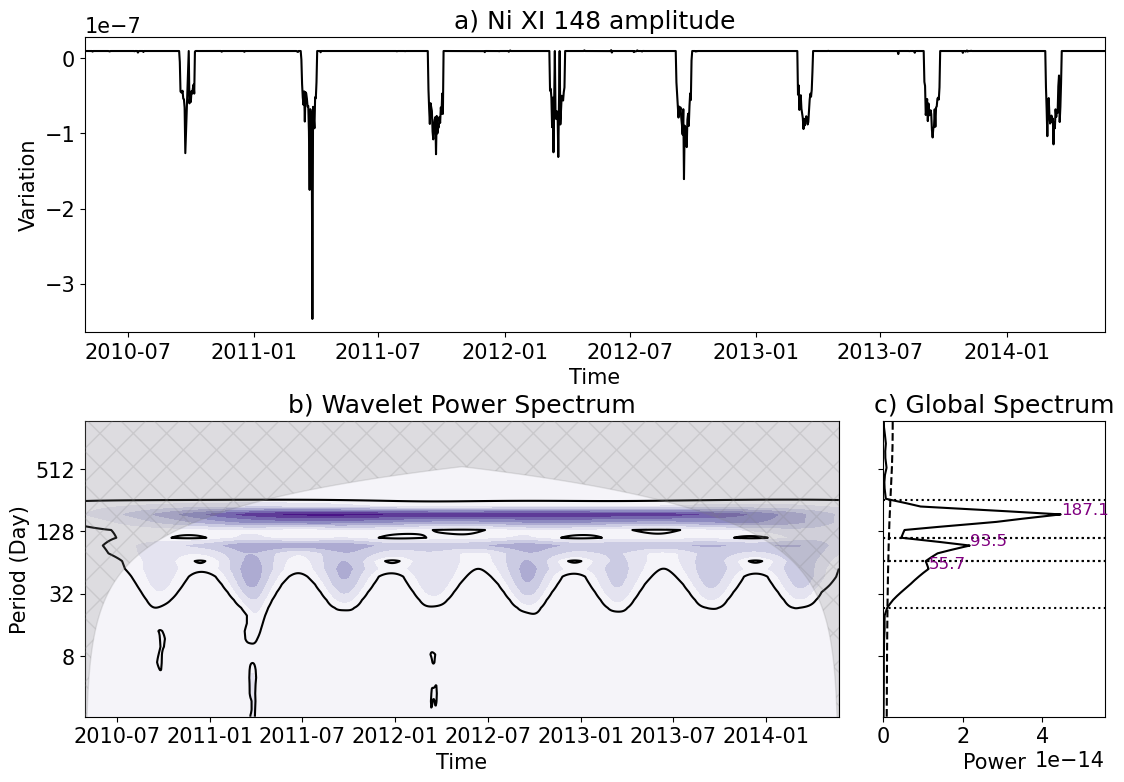

In [ ]:
do_wavelet(sst=daily_df_eclipse['median_of_'+'amplitude'].values-daily_df['median_of_'+'amplitude'].values,
    dt=1,
    time=daily_df_eclipse.index,
    show_peaks=True,
    unit=None,
    title=selected_band.loc[index]['Line Name']+' '+'amplitude',
    # fig_name='output/daily_wavelet/'+property+'/'+selected_band.loc[index]['Line Name']+'_wavelet.png'
    ) 

## Draw solar eclipse impact

In [ ]:
def f(x):
    y=np.size(x)-np.sum(np.isnan(x))
    return y
        
for index in selected_band.index[:]:
    with open('./data/fit_10s/fit_10s_'+selected_band.loc[index]['Line Name']+'.pkl', 'rb') as file:
        fit_df = pickle.load(file)
    fit_df.set_index('time',inplace=True)

    # fit_df['amplitude']=np.where(fit_df['eclipse_flag'].values==0,fit_df['amplitude'].values,np.nan)
    # fit_df['mean']=np.where(fit_df['eclipse_flag'].values==0,fit_df['mean'].values,np.nan)
    # fit_df['stddev']=np.where(fit_df['eclipse_flag'].values==0,fit_df['stddev'].values,np.nan)

    stddev_of_mean=fit_df['mean'].resample('D').agg(np.nanstd)
    stddev_of_stddev=fit_df['stddev'].resample('D').agg(np.nanstd)
    stddev_of_amplitude=fit_df['amplitude'].resample('D').agg(np.nanstd)
    available_data=fit_df['amplitude'].resample('D').agg(f)


    columns_to_agg = ['amplitude', 'mean', 'stddev']
    daily_median = fit_df[columns_to_agg].resample('D').agg(np.nanmedian)

    # Create a new DataFrame 'daily_fit_df' to store the daily median, stddev, and amplitude
    # fwhm=2.3*stddev
    daily_df = pd.DataFrame()
    daily_df['median_of_mean'] = daily_median['mean']
    daily_df['median_of_stddev'] = daily_median['stddev']
    daily_df['median_of_amplitude'] = daily_median['amplitude']

    daily_df['stddev_of_mean']=stddev_of_mean
    daily_df['stddev_of_stddev']=stddev_of_stddev
    daily_df['stddev_of_amplitude']=stddev_of_amplitude

    daily_df['available_data']=available_data

    # save daily_df
    with open('./data/daily_df/no_eclipse_process/daily_df_'+selected_band.loc[index]['Line Name']+'.pkl', 'wb') as file:
        pickle.dump(daily_df, file) 

# test

In [54]:
import importlib
importlib.reload(do_wavelet)

<module 'do_wavelet' from 'd:\\py_repo\\EVE-spectrum-correction\\Chapter4_v3\\basic_ops\\eve_ops\\do_wavelet.py'>

Data variance =  1.1428831143388192
wave shape:  (31, 380)
period shape:  (31,)
scale shape:  (31,)
coi shape:  (380,)


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


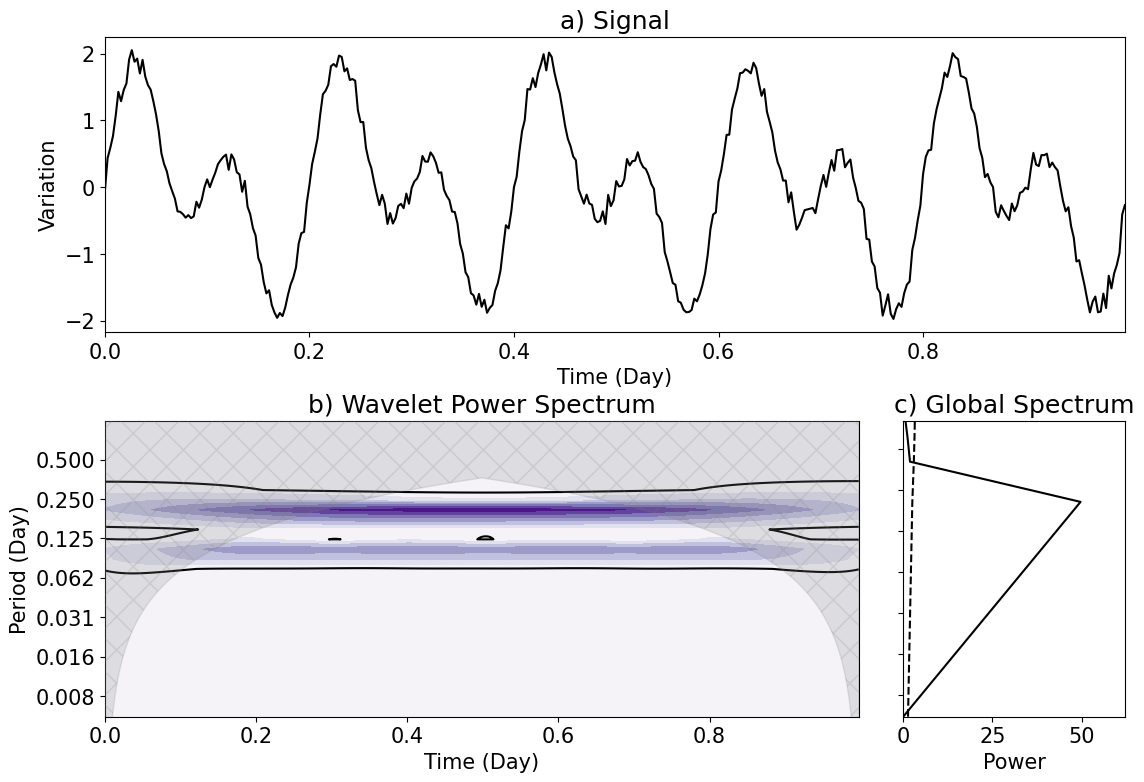

([], array([], dtype=float64), array([], dtype=float64))

In [50]:
import pandas as pd
import numpy as np
import do_wavelet
length= 380
sst=np.sin( np.arange(length)*2*np.pi/(length*0.2)) +np.random.randn(length)*0.1+\
1.1*np.sin( np.arange(length)*2*np.pi/(length*0.1))


do_wavelet.do_wavelet(
            sst, 1/length, 
        #    time=time, 
           unit='Day',  num=50)

Data variance =  4.709296744884503e-10
wave shape:  (39, 1486)
period shape:  (39,)
scale shape:  (39,)
coi shape:  (1486,)
peaks: [nan, 9.638171177272117e-09, 5.656981902344444e-08]
periods: [nan, 239.23269615331523, 834.9916623932752]


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:233: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


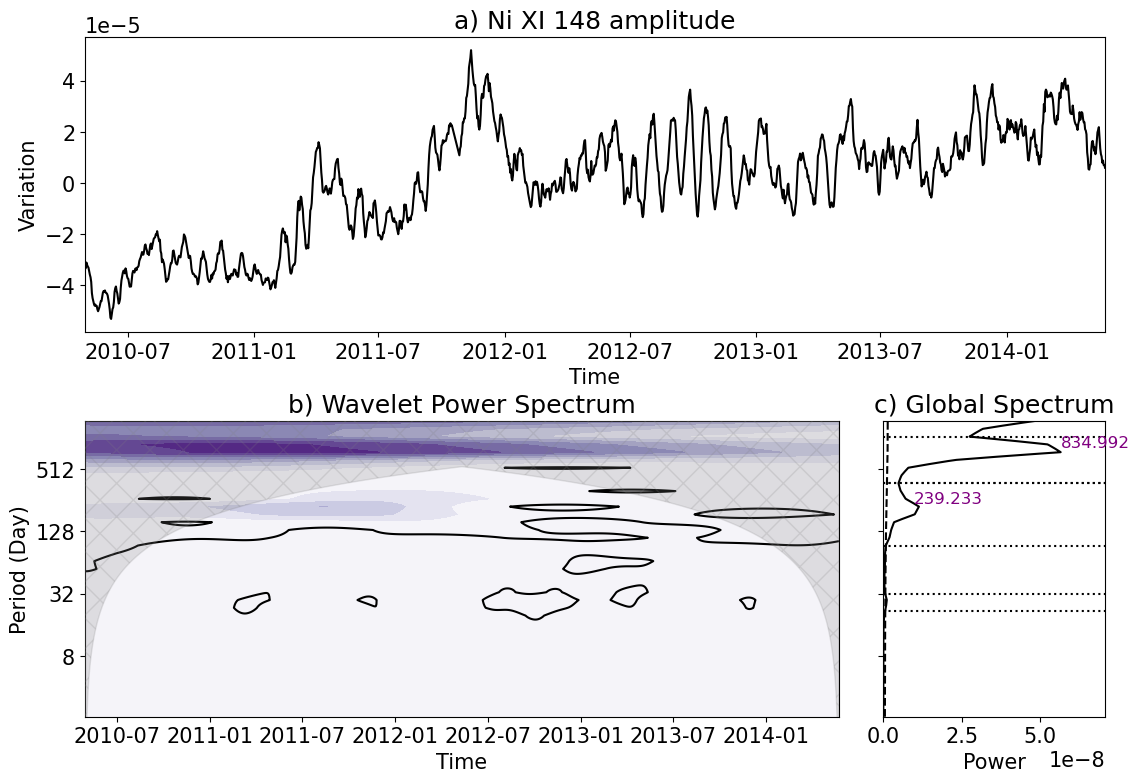

([nan, 239.23269615331523, 834.9916623932752],
 array([ 21.8660873,  93.4660873, 374.0660873]),
 array([  31.6660873,  374.0660873, 1057.8660873]))

In [55]:
band_index = 0
with open('./data/daily_df/daily_df_'+selected_band.loc[band_index]['Line Name']+'.pkl', 'rb') as file:
    daily_df = pickle.load(file)


daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]


do_wavelet.do_wavelet(
    daily_df['median_of_'+'amplitude'].values,
    dt=1,
    time=daily_df.index,
    show_peaks=True,
    unit=None,
    title=selected_band.loc[band_index]['Line Name']+' '+'amplitude',
)